In [3]:
from transformers import RobertaTokenizer
from transformers import TextClassificationPipeline


2024-05-28 21:57:56.933430: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 21:57:57.040772: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 21:57:57.413029: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 21:57:58.428215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import pandas
import json
import gc

In [5]:
from sklearn.model_selection import train_test_split

In [1]:
from datasets import load_dataset

dataset = load_dataset("Meduzka/ukr_psyops_false_news")

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25014
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12321
    })
})

In [6]:
dataset["train"]["text"]

['Звичайні люди, а війна це страшна, а люди можуть з голоду померти, можуть',
 'У суботу у Чебоксарах пройшов автопробіг на підтримку спецоперації, що проводиться на території України, російськими військами',
 'Нову порцію добірних фейків і чуток про російську спецоперацію поширюють у соцмережах українська влада Викриваємо найвражаючі✅',
 'І ЗНОВУ ВЕСНА ПОЧИНАЄТЬСЯ ЗІ СЛІЗ ПО НАШИХ РЕБІТАХ, ЯК І 22 РОКИ НАЗАД  498 російських військових загинули, ще 1597 отримали поранення в ході спецоперації із захисту Донбасу Про це заявили у Міноборони Росії ⚘⚘Сьогодні в Татарстані пройшли похорони Ільнура Сібгатулліна – героя, який загинув під час спецоперації в Україні Попрощатися з героїчним десантником – уродженцем республіки – прийшли сотні людей – його численні родичі, близькі, друзі та земляки-нижньокамці Детальніше: http://idel-tatru/news/novosti/on-srazhalsya-za-rodinu  http://idel-tatru/news/novosti/on-srazhalsya-za-rodinu',
 '❗️ До уваги пасажирів: спостерігаються тимчасові проблеми зі зв‘

In [7]:
dataset["train"]["label"]

[1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [13]:
def plot_sentence_length_distribution_and_count(dataset):
    labels = dataset['label']
    texts = dataset['text']
    sentence_lengths = [len(text.split()) for text in texts]
    unique_labels = sorted(set(labels))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    for label in unique_labels:
        label_sentence_lengths = [length for length, l in zip(sentence_lengths, labels) if l == label]
        ax1.hist(label_sentence_lengths, bins=20, alpha=0.5, label=str(label))
    
    ax1.set_xlabel('Sentence Length (Number of Words)')
    ax1.set_ylabel('Number of Sentences')
    ax1.set_title('Distribution of Sentence Lengths per Label')
    ax1.legend()
    
    label_sentence_counts = [len([l for l in labels if l == label]) for label in unique_labels]
    
    num_labels = len(unique_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, num_labels))
    
    ax2.bar(unique_labels, label_sentence_counts, color=colors)
    print(label_sentence_counts)
    
    ax2.set_xlabel('Label')
    ax2.set_ylabel('Total Number of Sentences')
    ax2.set_title('Total Number of Sentences per Label')
    
    plt.tight_layout()
    plt.show()

[12531, 12483]


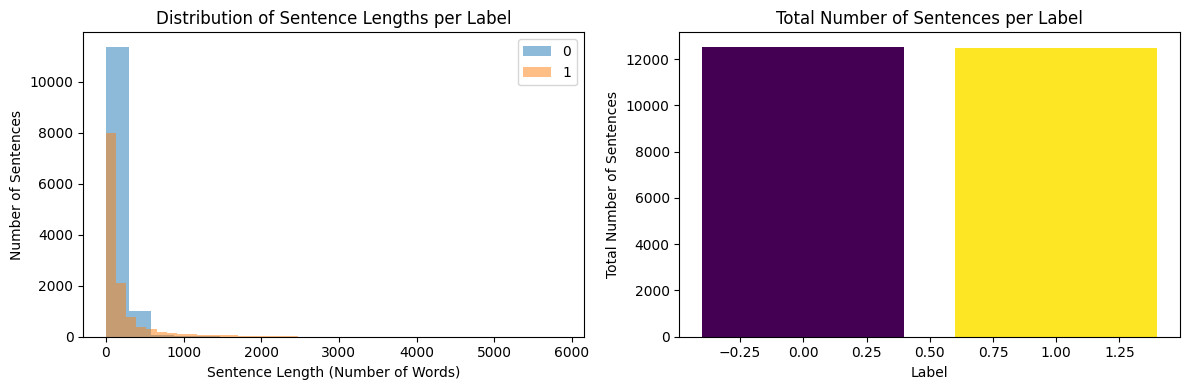

[6166, 6155]


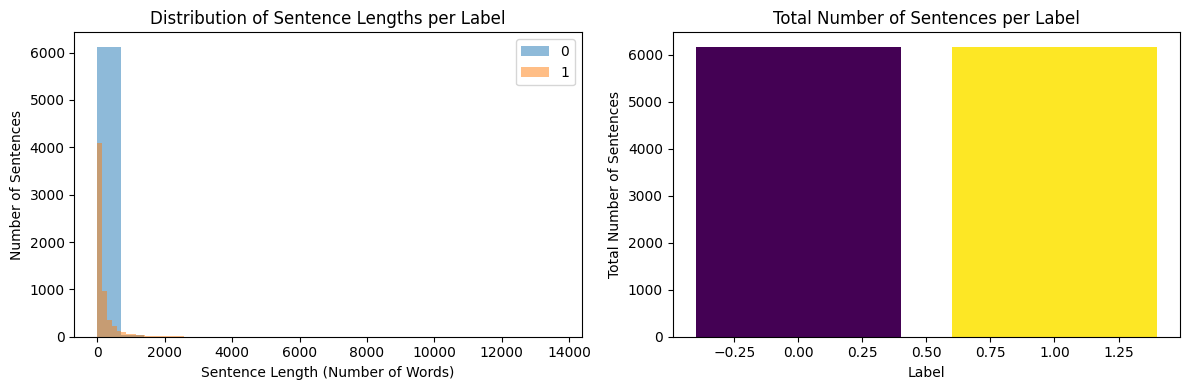

In [14]:
plot_sentence_length_distribution_and_count(dataset['train'])

plot_sentence_length_distribution_and_count(dataset['test'])

In [8]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    dataset["train"]["text"],
    dataset["train"]["label"],
    test_size = 0.2, random_state = 0
)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    dataset["test"]["text"],
    dataset["test"]["label"],
    test_size = 0.01,
    random_state = 0
)

In [9]:
# Model definition


In [10]:
tokenizer = RobertaTokenizer.from_pretrained("youscan/ukr-roberta-base");

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )

In [11]:
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [12]:
from torch.utils.data import Dataset

train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)

In [13]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained('youscan/ukr-roberta-base', num_labels=2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at youscan/ukr-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

# Set Batch Size
batch_size = 6
logging_steps = len(train_dataset) // batch_size
num_train_epochs = 4
lr_initial = 2e-5
weight_decay = 1e-3
output_dir = "./results"
training_args = TrainingArguments(output_dir=output_dir,
                                num_train_epochs=num_train_epochs,
                                learning_rate=lr_initial,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=weight_decay,
                                eval_strategy="epoch",
                                disable_tqdm=False,
                                logging_steps=logging_steps,
                                push_to_hub=False,
                                log_level="error")



trainer = Trainer(
    model=model,                 
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
)

In [15]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.101800,0.061770
2,0.024000,0.048864
3,0.007700,0.064679
4,0.000200,0.067885


TrainOutput(global_step=8132, training_loss=0.03339321343507118, metrics={'train_runtime': 68060.7111, 'train_samples_per_second': 0.717, 'train_steps_per_second': 0.119, 'total_flos': 1.283666216890368e+16, 'train_loss': 0.03339321343507118, 'epoch': 4.0})

In [16]:
trainer.evaluate()

{'eval_loss': 0.06788463145494461,
 'eval_runtime': 2148.1449,
 'eval_samples_per_second': 2.329,
 'eval_steps_per_second': 0.388,
 'epoch': 4.0}

In [18]:
save_directory='C:\\illia_diploma'

model.save_pretrained(save_directory)

tokenizer.save_pretrained(save_directory)

('C:\\illia_diploma\\tokenizer_config.json',
 'C:\\illia_diploma\\special_tokens_map.json',
 'C:\\illia_diploma\\vocab.json',
 'C:\\illia_diploma\\merges.txt',
 'C:\\illia_diploma\\added_tokens.json')

In [15]:
# Testing the model

In [19]:
from transformers import RobertaTokenizer
from transformers import RobertaForSequenceClassification
tokenizer_fine_tuned = RobertaTokenizer.from_pretrained('../diploma')
model_fine_tuned = RobertaForSequenceClassification.from_pretrained('../diploma')

In [31]:
test_text = dataset["test"]["text"][5]

In [32]:
test_text

'Чулпан Хаматова поїхала до Латвії та не обіцяла повернутися Туди ж вирушили Хазанов та Ярмольник – театрам доводиться скасовувати вистави через від\'їзд артистів   46-річна російська актриса, одна із засновниць благодійного фонду «Подаруй життя» Чулпан Хаматова переїхала з дітьми до Латвії   На момент початку спецоперації актриса перебувала за кордоном Вона не підтримала свій уряд і зараз живе з дочками в Латвії, де нещодавно звела будинок у селі   В інтерв\'ю для YouTube-каналу «Скажи Гордєєвої» Чулпан заявила, що вона "не зрадник" і дуже любить свою Батьківщину, але повертатися до Росії не збирається За словами Хаматової, грошей зараз їй вистачить на 3-4 місяці, а нову роботу вона ще не знайшла При цьому її благодійний фонд "Подаруй життя" продовжить роботу в Росії   Через несподіваний від\'їзд Хаматової московським театрам довелося терміново змінювати репертуар і скасовувати вистави за її участю   У такій ситуації виявився МХТ ім Чехова, де спектаклі за участю Ренати Литвинової дов

In [33]:
predict_input = tokenizer_fine_tuned.encode(
    test_text,
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors='pt'
)

output = model_fine_tuned(predict_input)

probs = output[0].softmax(1)
pred_label_idx = probs.argmax()

In [34]:
probs

tensor([[2.5046e-06, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)

In [35]:
pred_label_idx

tensor(1)